In [58]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the path to the file you'd like to load
file_path = "CAR DETAILS FROM CAR DEKHO.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "akshaydattatraykhare/car-details-dataset",
  file_path,
)

/var/folders/cn/0dflk63d5lj2brskz94j7c880000gn/T/ipykernel_54599/3100700778.py:14: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


# Car Price Dataset EDA

### Data Structure Overview

In [59]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [60]:
df.shape

(4340, 8)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [62]:
# Check for seller types
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [63]:
# Check for fuel types
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [64]:
# Check for transmission types
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [65]:
# Check for owner types
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [66]:
# I am curious about the 'Test Drive Car' owner type
df[df['owner'] == 'Test Drive Car']



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1714,Ford Freestyle Titanium Diesel,2020,784000,101,Diesel,Dealer,Manual,Test Drive Car
1715,Ford Figo Titanium,2020,635000,101,Petrol,Dealer,Manual,Test Drive Car
1716,Ford Ecosport 1.5 Diesel Titanium,2020,1000000,101,Diesel,Dealer,Manual,Test Drive Car
1774,Ford Aspire Titanium BSIV,2020,828999,1010,Petrol,Dealer,Manual,Test Drive Car
1775,Ford EcoSport 1.5 Ti VCT MT Titanium BE BSIV,2020,1119000,1010,Petrol,Dealer,Manual,Test Drive Car
1776,Ford Figo Titanium,2020,746000,1111,Petrol,Dealer,Manual,Test Drive Car
1777,Ford Ecosport 1.5 Petrol Trend,2020,1030000,1010,Petrol,Dealer,Manual,Test Drive Car
1778,Ford EcoSport 1.5 TDCi Titanium Plus BSIV,2020,1334000,1010,Diesel,Dealer,Manual,Test Drive Car
1779,Ford Freestyle Titanium,2020,811999,1010,Petrol,Dealer,Manual,Test Drive Car
1780,Ford Ecosport Thunder Edition Diesel,2020,1331000,1010,Diesel,Dealer,Manual,Test Drive Car


In [67]:
# How many 'Test Drive Car' are there?
df['owner'].value_counts()['Test Drive Car']


np.int64(17)

### Data Cleaning (Missing Values & Duplicates)

In [68]:
# Check for missing values and if we need to impute these values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [69]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(763)

In [70]:
# Show rows with duplicate values
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(20)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3912,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
4016,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
99,Audi A4 2.0 TDI 177 Bhp Premium Plus,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner
2578,Audi A4 2.0 TDI 177 Bhp Premium Plus,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner
554,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
573,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
592,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
611,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
899,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
918,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner


In [71]:
# Delete duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

In [72]:
# Convert 'year' to 'Age' of the car
df['Age'] = 2025 - df['year']
df.drop('year', axis=1, inplace=True)

In [73]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,18
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,18
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,13
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,8
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,11


### Exploratory Plots for Categorigal Features

from this part we can see this dataset is highly imbalanced!
However, we are performing regression type of problem instead of classification problems.
Therefore, the imbalanced dataset does not matter that much.

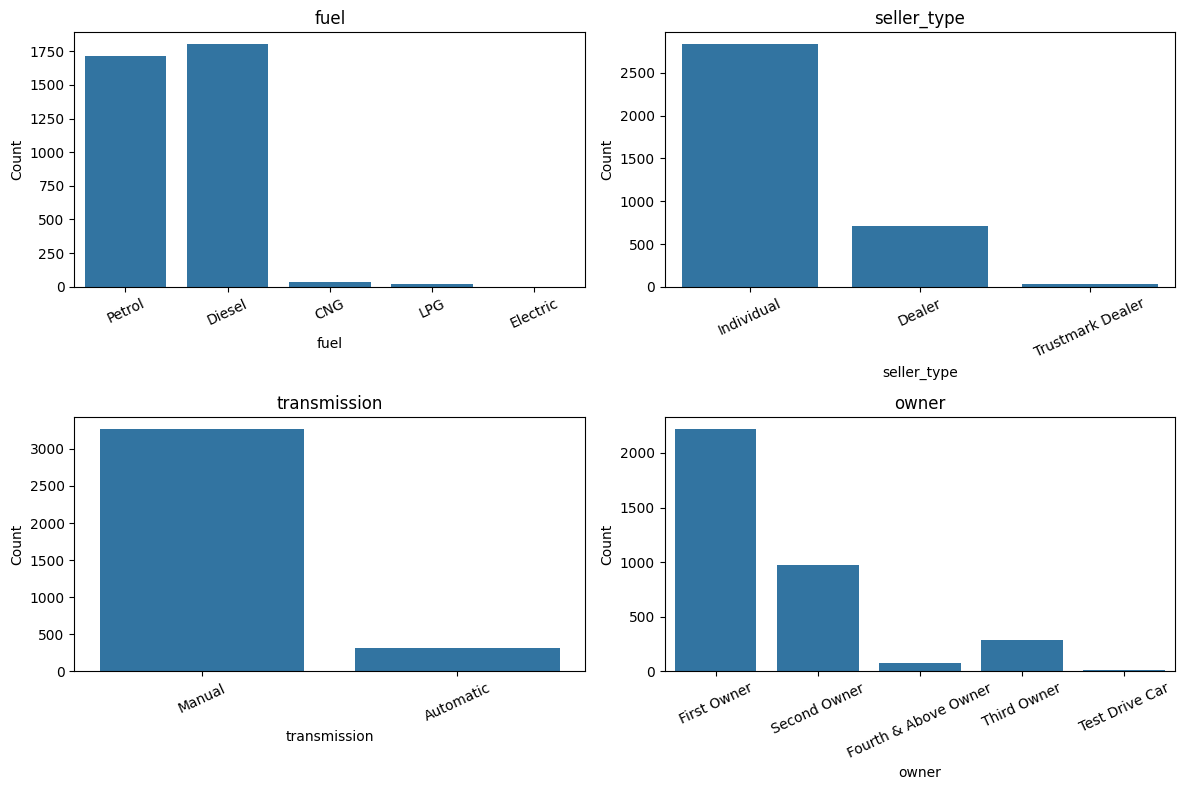

In [74]:
# Categorical columns in this dataset
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']

plt.figure(figsize=(12, 8))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

### Exploratory Plots for Numerical Features

There are some outliers in the dataset.
Random Forest Regression is not very sensitive to outliers, but for liner regression and SVM regression (which we are using
in this file), the outliers could affect the training very very extremely!
Therefore, we have to process the outliers.

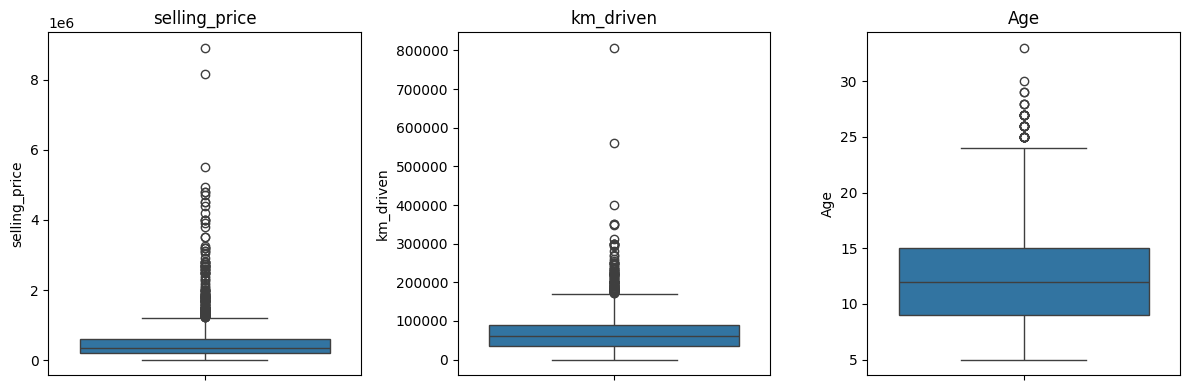

In [75]:
num_cols = ['selling_price', 'km_driven', 'Age']

plt.figure(figsize=(12, 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

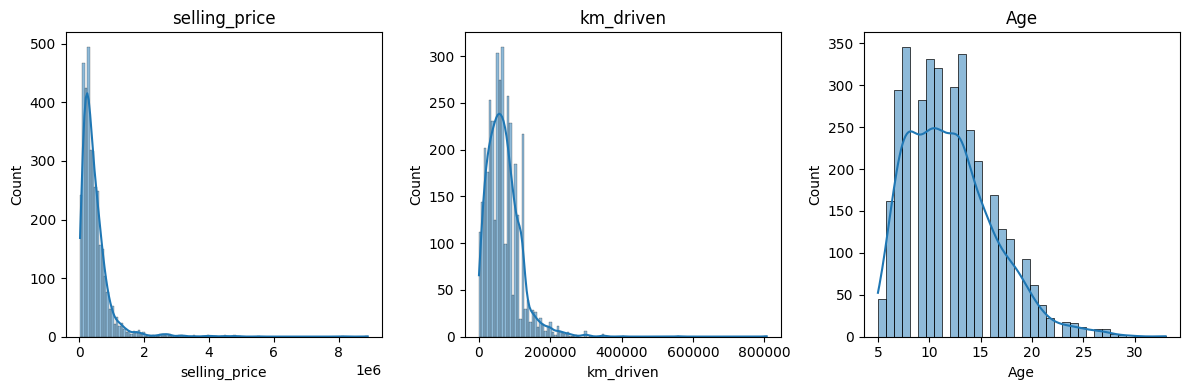

In [76]:
plt.figure(figsize=(12, 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


### One-Hot Encoding & Correlation Between Features and Price

In [77]:
# Change the name to brand and then perfrom one-hot encoding
df['name'].unique()


array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], shape=(1491,), dtype=object)

In [78]:
df['brand'] = df['name'].str.split().str[0]
print("Brand extracted from name:")
print(df['brand'].unique())

Brand extracted from name:
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


In [79]:
df['brand'] = df['brand'].replace('Land', 'Land Rover')

In [80]:
df.drop('name', axis=1, inplace=True)

In [81]:
# One-hot encoding
df_encoded = pd.get_dummies(
    df,
    columns=['fuel', 'seller_type', 'transmission', 'owner', 'brand'],
    drop_first=True
)

In [82]:
# Convert True/False to 0/1
bool_cols = df_encoded.select_dtypes('bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)


In [83]:
df_encoded.head()

,selling_price,km_driven,Age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,60000,70000,18,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,135000,50000,18,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,600000,100000,13,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,250000,46000,8,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,450000,141000,11,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df_encoded.corr()['selling_price'].sort_values(ascending=False)


selling_price                   1.000000
brand_Audi                      0.314256
brand_BMW                       0.291420
fuel_Diesel                     0.276873
brand_Mercedes-Benz             0.275457
brand_Land Rover                0.230396
brand_Toyota                    0.160112
brand_Volvo                     0.136820
brand_Jaguar                    0.117486
brand_Mahindra                  0.069176
seller_type_Trustmark Dealer    0.066012
owner_Test Drive Car            0.065189
brand_MG                        0.063567
brand_Jeep                      0.060085
brand_Ford                      0.045101
brand_Isuzu                     0.033695
brand_Honda                     0.032872
brand_Kia                       0.027128
brand_Mitsubishi                0.027117
brand_Skoda                     0.000379
brand_Volkswagen               -0.003929
brand_Nissan                   -0.004025
brand_Force                    -0.004200
fuel_Electric                  -0.005383
brand_Daewoo    

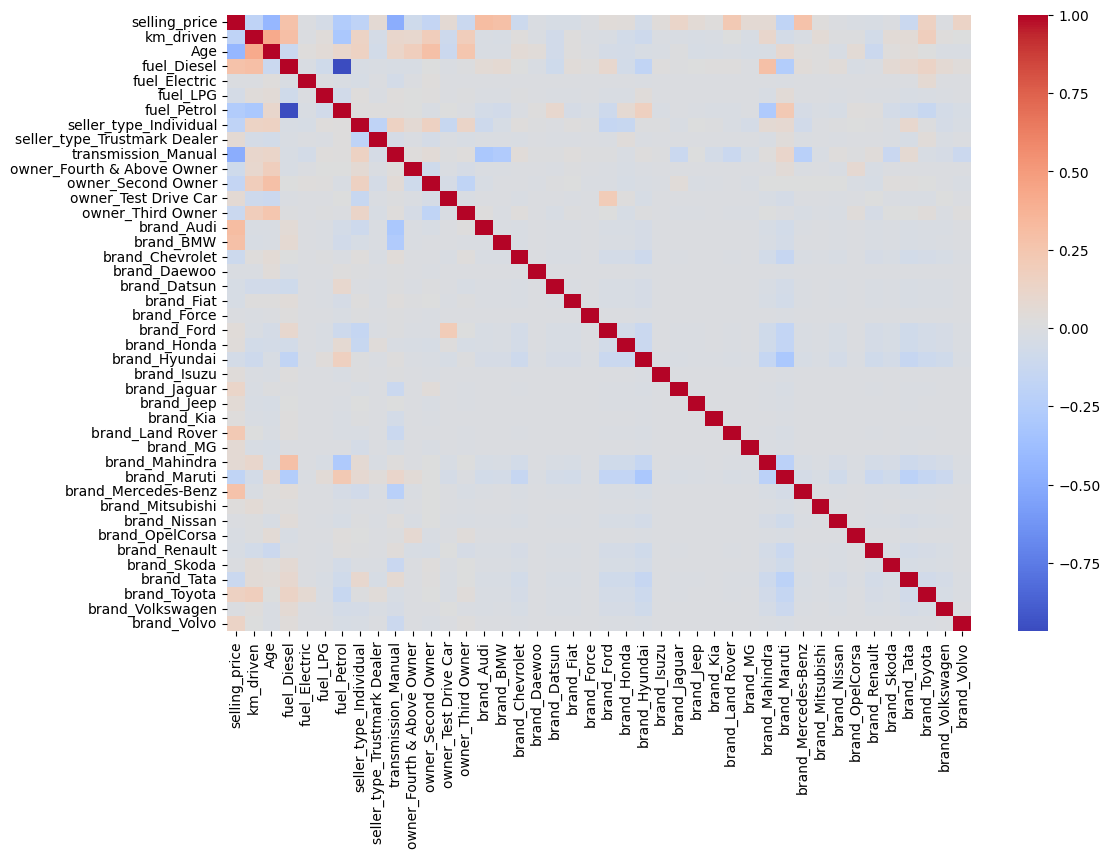

In [85]:
# Generate heatmap to visualize correlations
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.show()

# Model Training

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, median_absolute_error
from sklearn.model_selection import GridSearchCV

# Prepare features and target variable
X = df_encoded.drop(['selling_price'], axis=1)
y = df_encoded['selling_price']

In [87]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [88]:
# Hyperparameter search grid
param_grid = {
    'n_estimators': [64, 100, 128, 200],
    'max_depth': [10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10],
}

# GridSearchCV settings
rf = RandomForestRegressor(
    bootstrap=True,
    oob_score=True,
    max_features='sqrt',
    random_state=42
)


In [89]:
grid = GridSearchCV(rf, param_grid)

In [90]:
grid.fit(X_train, y_train)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [10, 15, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [64, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [100]:
print("Best params:", grid.best_params_)

Best params: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


In [101]:
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)


In [102]:
grid.best_estimator_.oob_score_

0.6885914968279125

# Evaluation

In [103]:
# Compute and print R² for train and test sets
train_r2 = best_rf.score(X_train, y_train)
test_r2 = r2_score(y_test, y_pred)

print(f"Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")

Train R²: 0.9151 | Test R²: 0.5859


In [104]:
# MAE
mae = mean_absolute_error(y_test, y_pred)

# Median Absolute Error
medae = median_absolute_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAPE (%)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

# R²
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics")
print(f"MAE:   {mae:,.2f}")
print(f"MedAE: {medae:,.2f}")
print(f"RMSE:  {rmse:,.2f}")
print(f"MAPE:  {mape:,.2f}%")
print(f"RMSLE: {rmsle:.4f}")
print(f"R²:    {r2:.4f}")


Evaluation Metrics
MAE:   148,343.59
MedAE: 81,711.35
RMSE:  365,254.44
MAPE:  37.79%
RMSLE: 0.4110
R²:    0.5859


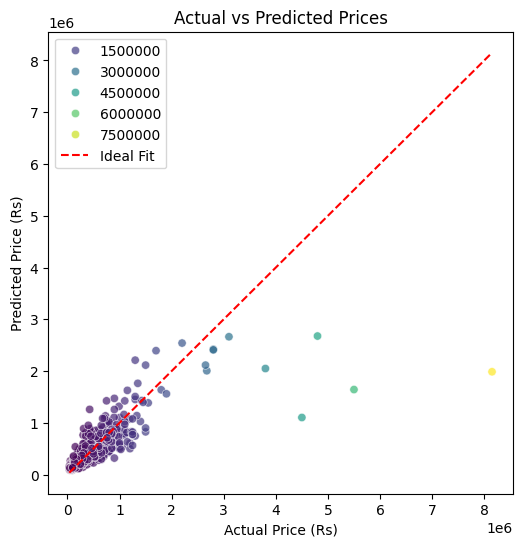

In [105]:
plt.figure(figsize=(6, 6))

# scatter plot of actual vs predicted prices
sns.scatterplot(
    x=y_test,
    y=y_pred,
    hue=y_test,
    palette="viridis",
    alpha=0.7
)

plt.xlabel("Actual Price (Rs)")
plt.ylabel("Predicted Price (Rs)")
plt.title("Actual vs Predicted Prices")

# idea fit line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Fit')

plt.legend()
plt.show()



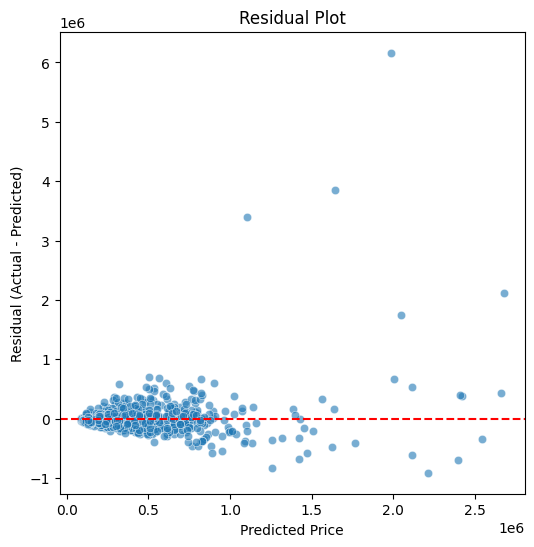

In [106]:
# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


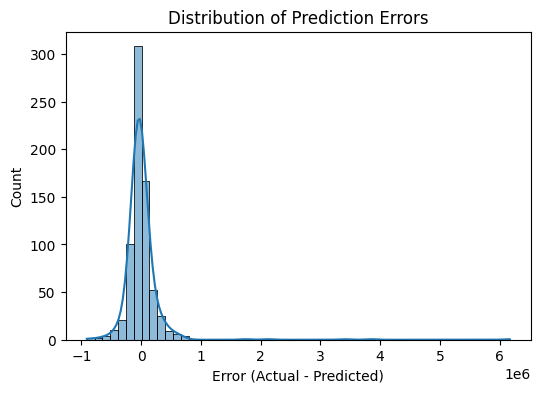

In [107]:
# Error Distribution Plot
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.show()


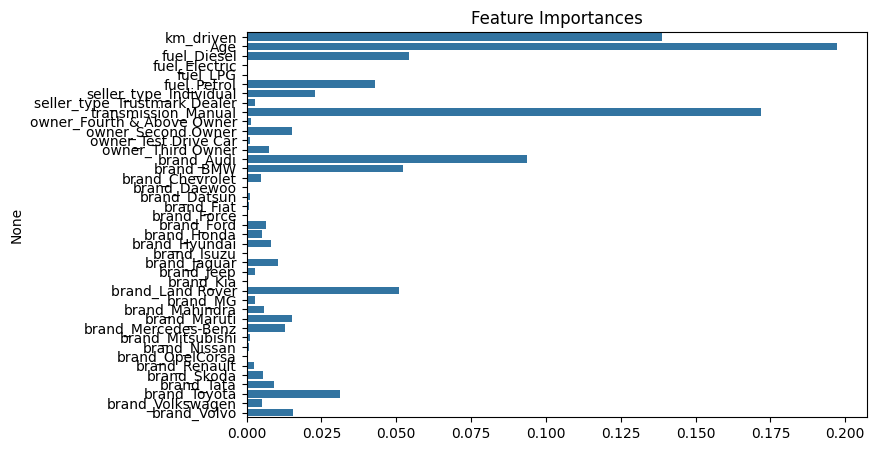

In [108]:
# Feature Importance Plot
importances = best_rf.feature_importances_
feat_names = X_train.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances")
plt.show()
